### This is the function-by-function implementation of the codes. The class implemetation is contained in the 'pred_class' file.

In [615]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


obj_df = pd.read_csv('objdbase.csv')
obj_df # The dataset

,Value1,Value2,Value3,Value4,Value5,Value6,Value7,Value8,Value9,Value10,Value11,Value12,Value13,Value14,Value15,Value16,Value17,Value18,Substance
0,247,516,447,726,8866,20429,1007,1349,17772,1155,2753,820,655,486,545,422,17348,5110,Cassava Flour
1,247,516,447,726,8864,20426,1006,1349,17776,1155,2755,820,655,486,545,422,17348,5110,Cassava Flour
2,247,516,447,726,8863,20425,1007,1349,17802,1156,2759,820,655,486,546,422,17349,5112,Cassava Flour
3,247,516,447,726,8861,20424,1007,1350,17825,1157,2762,821,656,486,546,422,17349,5113,Cassava Flour
4,247,516,447,726,8860,20420,1007,1349,17812,1156,2761,820,655,486,546,422,17348,5113,Cassava Flour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,133,236,177,293,3446,7078,459,534,17465,638,2073,339,375,288,388,331,5091,1332,3.5% Fat Milk
386,131,235,176,292,3441,7074,454,530,17100,630,2034,337,371,283,384,327,5090,1331,3.5% Fat Milk
387,131,235,176,292,3436,7068,451,528,16965,628,2019,336,369,282,382,324,5090,1331,3.5% Fat Milk
388,131,235,176,292,3431,7063,452,528,16934,628,2014,335,368,282,381,324,5090,1332,3.5% Fat Milk


In [616]:
for i in obj_df.loc[obj_df['Substance'] == '3.5% Fat Milk'].head().values:
    print(list(i))

[129, 235, 178, 299, 3593, 7257, 434, 516, 15344, 605, 1823, 327, 351, 266, 366, 307, 5096, 1311, '3.5% Fat Milk']
[131, 236, 179, 299, 3583, 7245, 448, 527, 16493, 626, 1956, 334, 364, 281, 379, 323, 5100, 1315, '3.5% Fat Milk']
[132, 237, 178, 299, 3572, 7232, 452, 530, 16703, 630, 1975, 336, 367, 282, 382, 325, 5101, 1317, '3.5% Fat Milk']
[132, 236, 178, 298, 3563, 7221, 450, 529, 16531, 628, 1960, 335, 366, 280, 380, 323, 5102, 1318, '3.5% Fat Milk']
[131, 236, 178, 298, 3555, 7210, 447, 526, 16311, 625, 1933, 333, 363, 278, 377, 319, 5101, 1319, '3.5% Fat Milk']


In [617]:
print(obj_df.shape) # 390 rows and 19 columns

(390, 19)


In [618]:
unique_subs = list(obj_df.Substance.unique()) # The unique substances
print(unique_subs)

['Cassava Flour', 'Garri', 'Honey', 'Sunflower Oil', '4%-Fat Liquid Milk', 'White Onion', 'Table Salt', 'Yam Flour', 'Paracetamol', 'Fresh Tomato', 'Rapeseed Oil', 'Clipper Oil', '3.5% Fat Milk']


In [619]:
print(len(obj_df.Substance.unique())) # There are 13 different unique substances

13


In [620]:
print(obj_df['Substance'].value_counts()) # Each substance was scanned 30 times

Cassava Flour         30
Garri                 30
Honey                 30
Sunflower Oil         30
4%-Fat Liquid Milk    30
White Onion           30
Table Salt            30
Yam Flour             30
Paracetamol           30
Fresh Tomato          30
Rapeseed Oil          30
Clipper Oil           30
3.5% Fat Milk         30
Name: Substance, dtype: int64


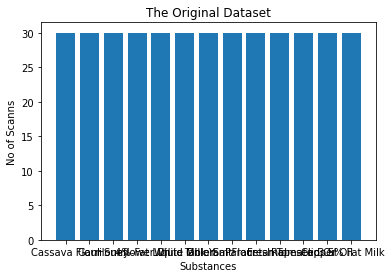

In [621]:
# A plot of the substances in the database with their number of scans.
x_val = unique_subs
y_val = list(obj_df['Substance'].value_counts())
plt.bar(x_val, y_val)
plt.xlabel('Substances')
plt.ylabel('No of Scanns')
plt.title('The Original Dataset')
plt.show()

In [622]:
# The values of the ddatasets only (without the column names)
obj_vals = obj_df.values
print(obj_vals)

[[247 516 447 ... 17348 5110 'Cassava Flour']
 [247 516 447 ... 17348 5110 'Cassava Flour']
 [247 516 447 ... 17349 5112 'Cassava Flour']
 ...
 [131 235 176 ... 5090 1331 '3.5% Fat Milk']
 [131 235 176 ... 5090 1332 '3.5% Fat Milk']
 [130 234 176 ... 5089 1331 '3.5% Fat Milk']]


In [623]:
def val_ave(df):
    '''
    This function performs element-wise addition and averaging of the numerical values of the datasets, substance-by-substance.
    At the end it produces a dataset of these values together with their corresponding substances.
    
    Params: df - Dataframe of fingerprints (numerical values) with their corresponding substance labels. One important condition 
    is that all the substances must be scanned for equal number of times.
    
    Return: Returns a list of lists of the averaged datasets, with their corresponding substance labels.
    '''
    vals_list = np.zeros(18)
    cnt = 0
    num_scan = len(df.values)/len(df.Substance.unique()) # Number of scans of eah substance
    vals_lists = []

    for subs in list(df.Substance.unique()):
        for vals in df.values:
            if vals[-1] == subs: # vals[-1] is the last element in the list which is the substance
                cnt += 1
                vals_list = np.add(vals_list, np.array(vals[:-1])) # Element-wise addition. vals[:-1] is a list of only the numerical values

            elif cnt == num_scan:
                break

        vals_list /= num_scan # Element-wise averaging
        vals_list = np.around(list(vals_list))
        vals_list = list(vals_list)
        vals_list = [math.trunc(fin_list) for fin_list in vals_list] # Remove decimal points
        vals_list.append(subs)
        vals_lists.append(vals_list)
        cnt = 0
        vals_list = np.zeros(18)
        
    return  vals_lists
    
vals_lists = val_ave(obj_df)
print(vals_lists)

[[246, 516, 446, 724, 8831, 20379, 1005, 1347, 17883, 1156, 2771, 820, 654, 483, 543, 420, 17330, 5114, 'Cassava Flour'], [186, 399, 350, 561, 7108, 15672, 570, 854, 6411, 630, 968, 513, 294, 222, 288, 230, 12735, 3737, 'Garri'], [70, 141, 101, 155, 1514, 3401, 189, 270, 1564, 261, 262, 157, 186, 255, 244, 163, 2468, 673, 'Honey'], [119, 221, 134, 190, 2010, 4044, 296, 363, 14339, 472, 1433, 247, 358, 347, 352, 257, 2901, 778, 'Sunflower Oil'], [141, 245, 187, 308, 3540, 7341, 534, 622, 25661, 702, 2956, 390, 544, 518, 575, 432, 5721, 1523, '4%-Fat Liquid Milk'], [116, 246, 213, 328, 3927, 8688, 321, 522, 761, 356, 271, 328, 159, 123, 156, 112, 8633, 2389, 'White Onion'], [197, 448, 366, 613, 7296, 16274, 1000, 1109, 45150, 1241, 7568, 794, 1889, 1256, 880, 513, 11233, 3458, 'Table Salt'], [198, 406, 357, 525, 6037, 12463, 592, 794, 31683, 694, 4723, 434, 843, 748, 750, 500, 7717, 2468, 'Yam Flour'], [143, 256, 216, 360, 3288, 7006, 762, 689, 27490, 783, 12789, 402, 5825, 4342, 2382, 1

In [624]:
garri = [186, 399, 350, 561, 7108, 15672, 570, 854, 6411, 630, 968, 513, 294, 222, 288, 230, 12735, 3737]
honey = [70, 141, 101, 155, 1514, 3401, 189, 270, 1564, 261, 262, 157, 186, 255, 244, 163, 2468, 673]
milk_4 = [141, 245, 187, 308, 3540, 7341, 534, 622, 25661, 702, 2956, 390, 544, 518, 575, 432, 5721, 1523]
milk_3 = [129, 235, 176, 294, 3498, 7143, 437, 519, 15898, 612, 1892, 328, 356, 272, 370, 313, 5093, 1323]
milks_3 = [179, 285, 258, 349, 3643, 7307, 484, 566, 15394, 655, 1873, 377, 401, 316, 416, 357, 5146, 1361]
milks3 = [129, 235, 178, 299, 3593, 7257, 434, 516, 15344, 605, 1823, 327, 351, 266, 366, 307, 5096, 1311]
unknown = [231, 336, 278, 398, 3655, 7310, 547, 626, 16411, 725, 2033, 433, 463, 378, 477, 419, 5201, 1419]

def list_diffs(obj_name, vals_lists=vals_lists):
    '''
    This function takes the element-wise differences between any new dataset of a substance and all the existing averaged 
    datasets from the database. The intention is to see how close these differences are to zero. If the new dataset is exactly
    of equal values with any dataset in the list of lists, then the resulting difference dataset would come down to zeros.
    Thereafter, a threshold of 100 was used to take the element-wise difference of all these values again. By so doing, 
    the closer the values are to 100, the more likely that substance is to predicted. Finally their absolute values were taken.
    
    Note: The value of the threshold can be changed at will.
    
    Params: 
    1. obj_name - A dataset of a substance acquired in the form of a list of numerical values. Note that the length
    of this list must be equal with the number of columns of the database, excluding the substance name.
    
    2. vals_lists - The output of the 'val_ave' function. This is a constant parameter.
    
    Return: Returns a list of lists containing the absolute values of the element-wise differences between the new object
    dataset and the existing datasets from the 'val_ave' function; and again between the threshold value and the resultant
    datasets.
    '''
    diffs_lists = []
    threshold = 100

    for lists in vals_lists:
        diff_list = np.absolute(np.subtract(np.array(obj_name), np.array(lists[:-1])))
        diff_lists = list(np.absolute(np.subtract(threshold, diff_list)))
        diff_lists.append(lists[-1])
        diffs_lists.append(diff_lists)
        
    return diffs_lists

diffs_lists = list_diffs(unknown)
print(diffs_lists)

[[85, 80, 68, 226, 5076, 12969, 358, 621, 1372, 331, 638, 287, 91, 5, 34, 99, 12029, 3595, 'Cassava Flour'], [55, 37, 28, 63, 3353, 8262, 77, 128, 9900, 5, 965, 20, 69, 56, 89, 89, 7434, 2218, 'Garri'], [61, 95, 77, 143, 2041, 3809, 258, 256, 14747, 364, 1671, 176, 177, 23, 133, 156, 2633, 646, 'Honey'], [12, 15, 44, 108, 1545, 3166, 151, 163, 1972, 153, 500, 86, 5, 69, 25, 62, 2200, 541, 'Sunflower Oil'], [10, 9, 9, 10, 15, 69, 87, 96, 9150, 77, 823, 57, 19, 40, 2, 87, 420, 4, '4%-Fat Liquid Milk'], [15, 10, 35, 30, 172, 1278, 126, 4, 15550, 269, 1662, 5, 204, 155, 221, 207, 3332, 870, 'White Onion'], [66, 12, 12, 115, 3541, 8864, 353, 383, 28639, 416, 5435, 261, 1326, 778, 303, 6, 5932, 1939, 'Table Salt'], [67, 30, 21, 27, 2282, 5053, 55, 68, 15172, 69, 2590, 99, 280, 270, 173, 19, 2416, 949, 'Yam Flour'], [12, 20, 38, 62, 267, 204, 115, 37, 10979, 42, 10656, 69, 5262, 3864, 1805, 503, 352, 289, 'Paracetamol'], [43, 40, 28, 52, 272, 123, 261, 226, 15699, 340, 1759, 126, 251, 202, 27

In [625]:
def pairing(diffs_lists=diffs_lists):
    '''
    This function takes the average of each list in the resultant list of lists from the 'list_diffs' function. Each of these 
    average values is paired with its corresponding name label. The idea is that the most likely substance would have an
    average value very close to the threshold (100 in this case).
    
    Params: diffs_lists - A constant parameter. The output of the 'list_diffs' function.
    
    Return: Returns a list of lists containing the average values and their corresponding object name labels.
    '''
    div_list = []
    div_lists = []
    added = 0
    for my_list in diffs_lists:
        divided = 0
        for element in my_list[:-1]:
            added += element
        divided = added / len(my_list[:-1])    
        div_list = list(np.append(my_list[-1], int(divided)))
        div_lists.append(div_list)
        added = 0

    return div_lists

div_lists = pairing()
print(div_lists)

[['Cassava Flour', '2109'], ['Garri', '1824'], ['Honey', '1525'], ['Sunflower Oil', '600'], ['4%-Fat Liquid Milk', '610'], ['White Onion', '1341'], ['Table Salt', '3243'], ['Yam Flour', '1646'], ['Paracetamol', '1920'], ['Fresh Tomato', '1149'], ['Rapeseed Oil', '460'], ['Clipper Oil', '860'], ['3.5% Fat Milk', '36']]


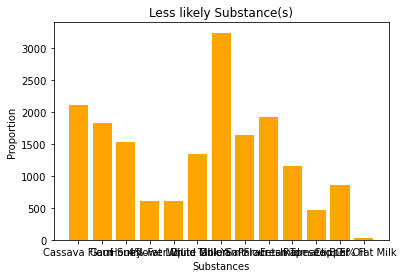

No matching substance!
Available substances: [['Cassava Flour', '2109'], ['Garri', '1824'], ['Honey', '1525'], ['Sunflower Oil', '600'], ['4%-Fat Liquid Milk', '610'], ['White Onion', '1341'], ['Table Salt', '3243'], ['Yam Flour', '1646'], ['Paracetamol', '1920'], ['Fresh Tomato', '1149'], ['Rapeseed Oil', '460'], ['Clipper Oil', '860'], ['3.5% Fat Milk', '36']]


In [626]:
def collections(div_lists=div_lists):
    '''
    This function carries out the prediction proper, by comparing the individual average values with a range set with 'min'
    and 'max' variables. 
    
    Note: The value of these variables can be changed at will.
    
    Params: div_lists - A constant parameter. The output of the 'pairing' function.
    
    Return:
    1. A list of lists of the predicted substance(s) with their averaged values.
    2. A list of lists of the unlikely substances with their averaged values.
    3. A plot of the predicted substance(s) with their averaged values
    4. A plot of the unlikely substances with their averaged values.
    '''
    cnt = 0
    min = 50
    max = 373
    coll_1 = []
    coll_2 = []
    obj_coll_1 = []
    val_coll_1 = []
    obj_coll_2 = []
    val_coll_2 = []
    for pairs in div_lists:
        cnt += 1
        if min <= int(pairs[-1]) <= max:
            coll_1.append(pairs) # Creating a list for the more likely substance(s)
        
        else:
            coll_2.append(pairs) # Creating a list for the less likely substances
             
    for packs in coll_2:
        obj_coll_2.append(packs[0])
        val_coll_2.append(int(packs[1]))
    
    # Plot for the less likely substances
    plt.bar(obj_coll_2, val_coll_2, color='orange')
    plt.xlabel('Substances')
    plt.ylabel('Proportion')
    plt.title('Less likely Substance(s)')
    plt.show()
    
    if (cnt == len(div_lists)) and (len(coll_1) == 0):
        return 'No matching substance!', 'Available substances: {}'.format(coll_2)
    else:
        for pack in coll_1:
            obj_coll_1.append(pack[0])
            val_coll_1.append(int(pack[1]))
        
        # Plot for the more likely substance(s)
        plt.bar(obj_coll_1, val_coll_1, color='green')
        plt.xlabel('Substances')
        plt.ylabel('Proportion')
        plt.title('Likely Substance(s)')
        plt.show()
        
        return 'More likely substance(s): {}'.format(coll_1), 'Less likely substance(s): {}'.format(coll_2)

coll_1, coll_2 = collections()
print(coll_1)
print(coll_2)

In [627]:
# Predicting with Random Forest

def rand_forest(objdf, obj_list):
    '''
    This function implements substance prediction using the Random Forest algorithm of the sklearn.
    
    Params:
    1. objdf - A csv database of object fingerprints with their corresponding object name labels.
    2. obj_list - A list containing numerical values which are the fingerprint of an object to be identified.
    
    Return: Returns a predicted substance.
    '''
    df = pd.read_csv(objdf)
    X = df.drop(columns=['Substance'])
    y = df['Substance']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict([obj_list])
    return predictions

predictions = rand_forest('objdbase.csv', unknown)
predictions

array(['4%-Fat Liquid Milk'], dtype=object)